Within this notebook, graphviz files for MSRs are produced

In [2]:
#test

from graphviz import Digraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as col
import scipy as sci

msre = Digraph(name = 'msre-proc', comment = 'MSRE processing')

In [3]:
with msre.subgraph(name = 'cluster_1') as f:
    f.attr(label = 'Fuel Processing Cell')
    f.node('B', 'Gas Supply Tanks')
    f.node('C','High Temp \nNaF Absorber')
    f.node('D', 'Caustic\nScrubber')

msre.node('E', 'Portable \nUF6 Absorber')
msre.attr(ratio = 'auto')

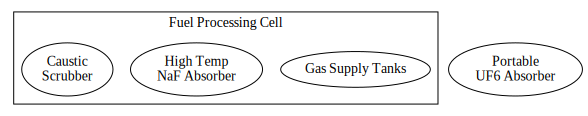

In [4]:
msre

In [5]:
msbr = Digraph(name = 'msrb-offgas', format = 'svg', comment = 'MSBR Offgas')

In [6]:
viri = cm.get_cmap('viridis',7)

In [7]:
msbr.node('A','Gas Separator')
msbr.node('B','Bubble Generator')
msbr.node('C','Entrainment Separator')
msbr.node('D','Particle Trap')
msbr.node('E','Water-Cooled Charcoal Beds')
msbr.node('F','Water Detector & Trap')
msbr.node('G','Decay and Tritium Removal')
msbr.node('H','Pump Bowl', shape = 'box')
msbr.node('1','Salt In (10% of Salt leaving Pump)', shape = 'box')
msbr.node('2','Cover-Gas in Off-Gas System Seals', shape = 'box')

In [8]:
c0 = col.to_hex(viri(6), keep_alpha = True)
c1 = col.to_hex(viri(3), keep_alpha = True)
c2 = col.to_hex(viri(0), keep_alpha = True)


msbr.edge('1','A','Salt and Helium', color = c1, style = 'dashed')
msbr.edge('A','B','Salt Mainline', color = c0)
msbr.edge('A','C','Helium, Up\nTo 50% Salt', color = c1, style = 'dashed')
msbr.edge('B','H','Salt Out', color = c0)
msbr.edge('F','B','2 scfm Helium', color = c2, style = 'dotted')
msbr.edge('C','H','Salt Out', color = c0)
msbr.edge('C','D','9 scfm Helium', color = c2, style = 'dotted')
msbr.edge('H','D','2 scfm Helium', color = c2, style = 'dotted')
msbr.edge('D','E','11 scfm Helium', color = c2, style = 'dotted')
msbr.edge('E','F','9 scfm Helium', color = c2, style = 'dotted')
msbr.edge('E','G','2 scfm Helium', color = c2, style = 'dotted')
msbr.edge('G','2','2 scfm Helium', color = c2, style = 'dotted')

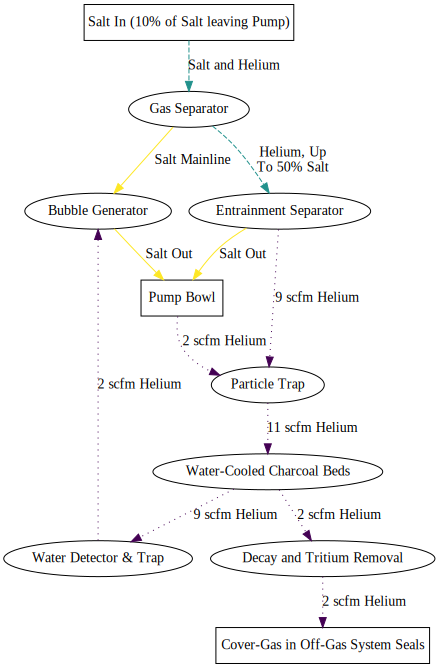

In [9]:
msbr
#helium w/ 50% salt is hard to clearly label
#it is all the gas leaving the gas separator,
#with as much as 50% salt in with it
#to act as heat sink

#Salt coming in only given as 10% of salt
#leaving each of the main pumps
#only the purely gas flows give rates in scfm

#should make separate legend, then can remove material comp
#from label to make things clearer

In [14]:
fpmsbr = Digraph(name = 'msre-proc', comment = 'MSRE processing')
fpmsbr.attr(compound = 'true')
fpmsbr.attr(rankdir = 'LR')

with fpmsbr.subgraph(name = 'cluster_2') as r:
    r.attr(label = 'Reduction\nExtraction\nUsing Bismuth')
    r.node('A','Pa Removal\nThree Day Cycle')
    r.node('B','Rare Earth\nRemoval\nFifty Day\nCycle')
    
fpmsbr.node('C','Fuel In')
fpmsbr.node('D','Fuel Out')

fpmsbr.edge('C','A',lhead = 'cluster_2')
fpmsbr.edge('A','B')
fpmsbr.edge('B','D',ltail = 'cluster_2')

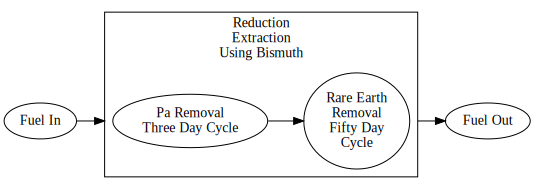

In [15]:
fpmsbr

In [37]:
msdr = Digraph(name = 'msdr-proc', comment = 'msdr-proc')

msdr.node('A','Pump\nDischarge')
msdr.node('B','Bubble\nGenerator')
msdr.node('C','Centrifugal\nGas Separator')
msdr.node('D','Drain Tank\n6hr Holdup')
msdr.node('E','Particle\nTrap')
msdr.node('F','Charcoal Beds\n90 Day Holdup')
msdr.node('G','To Pump Shaft\nOther Purge Points')
msdr.node('H','Pump\nInlet')

msdr.edge('A','B','Salt',color = c0)
msdr.edge('C','H','Salt', color = c0)
msdr.edge('B','C','Salt\nHelium',color = c1, style = 'dashed')
msdr.edge('C','D','Helium',color = c2, style = 'dotted')
msdr.edge('D','E','Helium', color = c2, style = 'dotted')
msdr.edge('E','B','50% He',color = c2, style = 'dotted')
msdr.edge('E','F','50% He', color = c2, style = 'dotted')
msdr.edge('F','G','Helium',color = c2, style = 'dotted')

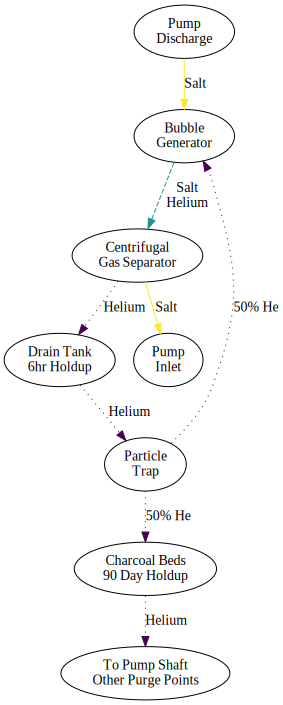

In [39]:
msdr